# Subtask 5: Sentiment Analysis #
Sentiment analysis techniques can be divided into rule-based and machine learning-based. Rule-based approaches rely on pre-defined rules and dictionaries of words associated with positive or negative sentiment and assign a sentiment score based on the presence of these words in the text. On the other hand, machine learning-based approaches use algorithms to learn from labelled training data and then classify the sentiment of new, unseen text data.

We will use both the original review dataset in Portuguese and the translated version.
First, we will import both datasets and deal with na values, as discussed in Subtask 1.

In [51]:
# import statements
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from collections import Counter
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

# NLTK tools for text processing
import re, nltk
from nltk import word_tokenize
from nltk.corpus import stopwords
nltk.download('punkt')
!pip install wordcloud
from wordcloud import WordCloud, STOPWORDS
nltk.download('stopwords')

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = 'all'

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\bisis\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\bisis\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [62]:
# load files, drop na values
order_reviews_data_eng = pd.read_csv('data/olist_order_reviews_dataset.csv', encoding='ISO-8859-1')
#order_reviews_data_por = pd.read_csv('data/olist_order_reviews_portuguese_dataset.csv', encoding='ISO-8859-1')
order_reviews_data_eng.shape
#order_reviews_data_por.shape

(100000, 7)

In [53]:
# drop na values from review_comment_title and review_comment_message 
order_reviews_data_eng_message_dropna = order_reviews_data.dropna(subset=['review_comment_message'])
order_reviews_data_eng_title_dropna = order_reviews_data.dropna(subset=['review_comment_title'])
print(order_reviews_data_eng_message_dropna.shape)
print(order_reviews_data_eng_title_dropna.shape)

(41744, 7)
(11715, 7)


The next steps in sentiment analysis involve the following:
* Remove stop words
* Use the RegEx module to accept only letters
* Tokenization
* Make all words lowercase <br>

In a sentiment analysis task, stop words such as "the" or "and" are unlikely to contribute much to determine the sentiment of a text. Removing these stop words can reduce noise in the data and improve the accuracy of the sentiment analysis. <br>
Tokenization is used in natural language processing to split paragraphs and sentences into smaller units that can be more easily assigned meaning. We are also making all words lowercase to achieve consistency.

In [54]:
comments_messages = [] # empty list to hold comments extracted from a text corpus
stop_words = set(stopwords.words('english')) # NLTK English stopwords

for words in order_reviews_data_eng_message_dropna['review_comment_message']:
    only_letters = re.sub("[^a-zA-Z]", " ",words)
    tokens = nltk.word_tokenize(only_letters) # tokenise the sentences
    lower_case = [l.lower() for l in tokens] # convert all letters to lower case
    filtered_result = list(filter(lambda l: l not in stop_words, lower_case)) # remove stopwords from the comments
    comments_messages.append(' '.join(filtered_result))

Next, we will visualise the findings.

<Figure size 2000x1200 with 0 Axes>

(-0.5, 1999.5, 999.5, -0.5)

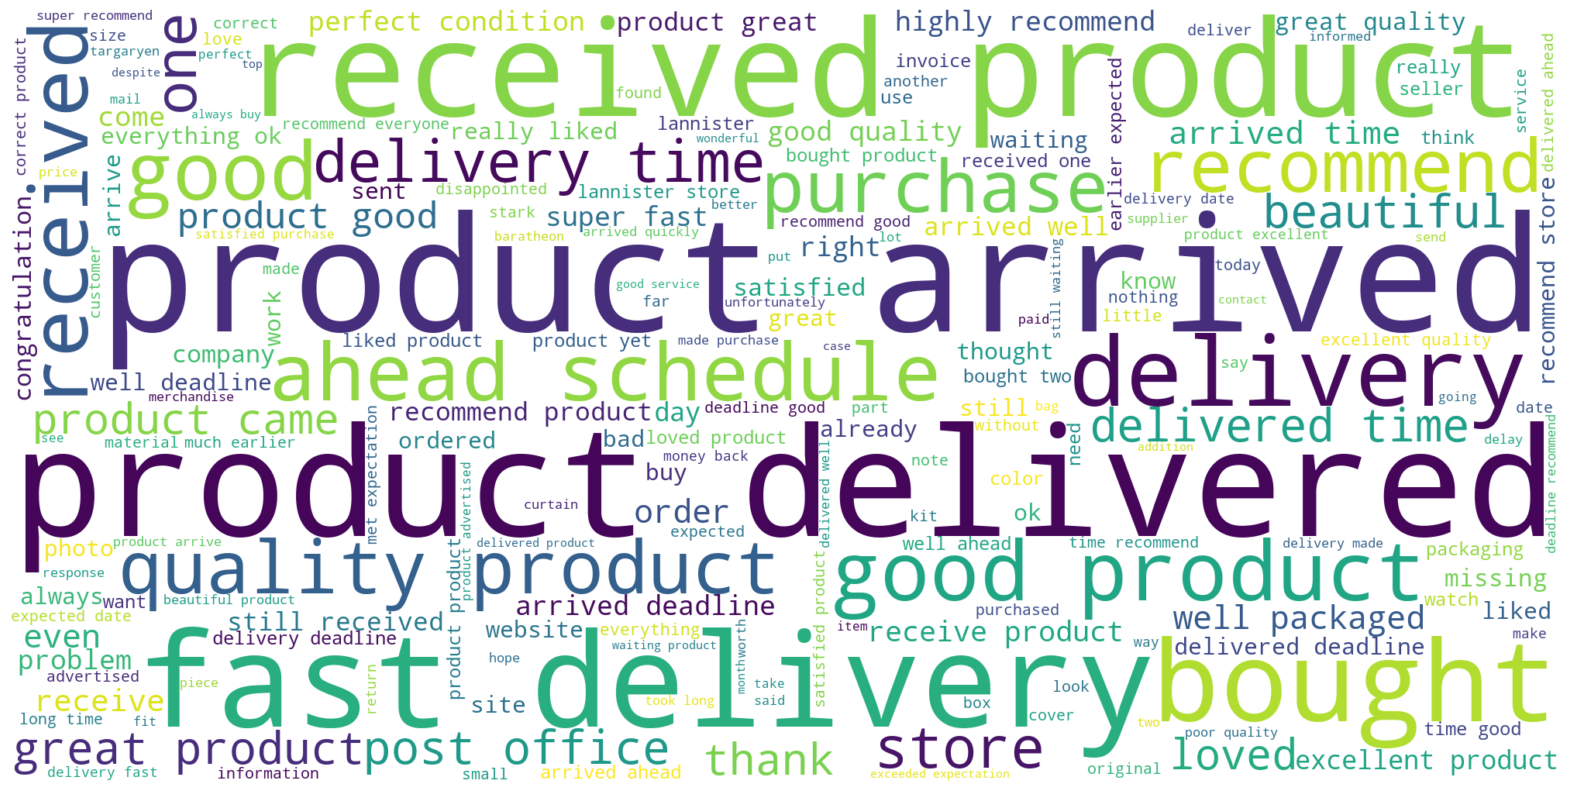

In [55]:
# visualise the comments list (wordcloud)
unique_string=(" ").join(comments_messages)
wordcloud = WordCloud(width = 2000, height = 1000,background_color='white').generate(unique_string)
plt.figure(figsize=(20,12))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

At first glance, we can see positive words such as 'product arrived', 'fast delivery', and 'good product'. This correlates with findings from Subtask 1: Exploratory Data Analysis, where we found that 57.4% of reviews were 5 stars.

Something to note here is that people were mostly commenting on the overall shopping experience (including the communication with the seller and the delivery) rather than the actual product. This occurs in real life, as customers are prompt to give feedback almost as soon as it arrives. At that stage, however, they are unlikely to comment on the actual product, its usage or its durability.



Next, we will extract the most frequent one words, two words and three words: **unigrams**, **bigrams**, and **trigrams**. <br>

Unigrams, bigrams, and trigrams are useful in sentiment analysis because they capture different levels of context and meaning in the text. For example, unigrams are useful for identifying individual words with positive or negative sentiments, such as "good" or "bad". Bigrams and trigrams can provide more context and help to identify sentiment in longer phrases or sentences. <br>

Using n-grams in sentiment analysis can improve the accuracy of the analysis by capturing more nuances of language and context. N-grams can also help to identify common phrases and language patterns associated with positive or negative sentiment, which can be helpful in developing more accurate and efficient sentiment analysis models.

In [56]:
# get the most important unigrams (CountVectorizer)
co = CountVectorizer(ngram_range=(1,1)) # unigrams
counts = co.fit_transform(comments_messages)
important_trigrams = pd.DataFrame(counts.sum(axis=0),columns=co.get_feature_names_out()).T.sort_values(0,ascending=False)
important_trigrams=important_trigrams.reset_index() # reset index
important_trigrams.rename(columns={'index':'trigrams',0:'frequency'},inplace=True) # rename columns
important_trigrams.head(40) # show results

,trigrams,frequency
0,product,18976
1,delivery,6559
2,good,6216
3,arrived,5675
4,time,5064
5,received,5052
6,delivered,4915
7,recommend,4712
8,deadline,3319
9,great,3191


We are displaying the 40 most frequent one words occurring in the dataset. These give us a high-level understanding; we can see words such as 'good', 'recommend' or 'received' being used frequently. However, we will examine the two and three words for deeper understanding.

In [57]:
# get the most important bigrams (CountVectorizer)
co = CountVectorizer(ngram_range=(2,2)) # bigrams
counts = co.fit_transform(comments_messages)
important_trigrams = pd.DataFrame(counts.sum(axis=0),columns=co.get_feature_names_out()).T.sort_values(0,ascending=False)
important_trigrams=important_trigrams.reset_index() # reset index
important_trigrams.rename(columns={'index':'trigrams',0:'frequency'},inplace=True) # rename columns
important_trigrams.head(40) # show results

,trigrams,frequency
0,product delivered,1911
1,product arrived,1903
2,fast delivery,1428
3,received product,1399
4,ahead schedule,1241
5,good product,1062
6,delivery time,941
7,quality product,914
8,post office,883
9,delivered time,853


The two-words are pretty helpful, we see the pattern of customers commenting on the delivery time, packaging and the product condition and quality. The consensus seems to be that products are good quality and arrived quickly. Next, let's see if the three-words still support this.

In [58]:
# get the most important trigrams (CountVectorizer)
co = CountVectorizer(ngram_range=(3,3)) # trigrams
counts = co.fit_transform(comments_messages)
important_trigrams = pd.DataFrame(counts.sum(axis=0),columns=co.get_feature_names_out()).T.sort_values(0,ascending=False)
important_trigrams=important_trigrams.reset_index() # reset index
important_trigrams.rename(columns={'index':'trigrams',0:'frequency'},inplace=True) # rename columns
important_trigrams.head(40) # show results

,trigrams,frequency
0,product delivered time,456
1,arrived ahead schedule,338
2,super fast delivery,327
3,well ahead schedule,298
4,product arrived time,285
5,still received product,279
6,delivered ahead schedule,228
7,product great quality,200
8,good quality product,195
9,product fast delivery,176


The overall opinions of the customers hold when examining the three-words, if anything, we can now see that the delivery was not only fast, it was also well ahead delivery deadline very often.<br>
On the other hand, some negative phrases occur within the results now: 'took a long time', and 'want the money back'. However, these are less frequent than the seemingly positive comments. Most customers were satisfied with the delivery service, and some others were satisfied with the product quality or packaging.

Next, we will perform the same steps for the review titles.

<Figure size 2000x1200 with 0 Axes>

(-0.5, 1999.5, 999.5, -0.5)

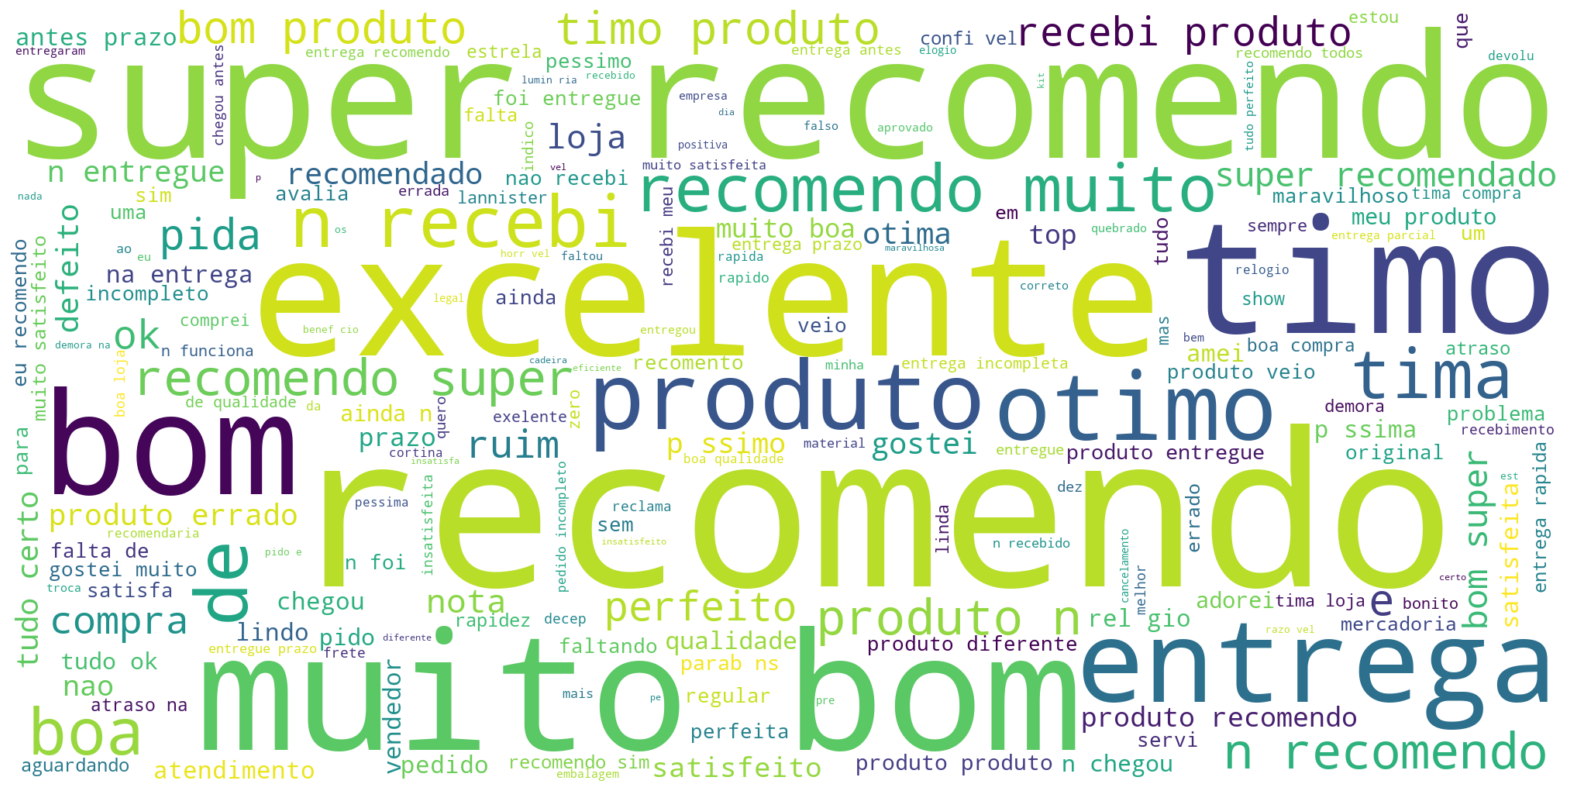

In [63]:
comments_titles = [] # empty list to hold comments extracted from a text corpus
stop_words = set(stopwords.words('english')) # NLTK English stopwords

for words in order_reviews_data_eng_title_dropna['review_comment_title']:
    only_letters = re.sub("[^a-zA-Z]", " ",words)
    tokens = nltk.word_tokenize(only_letters) # tokenise the sentences
    lower_case = [l.lower() for l in tokens] # convert all letters to lower case
    filtered_result = list(filter(lambda l: l not in stop_words, lower_case)) # remove stopwords from the comments
    comments_titles.append(' '.join(filtered_result))
    
# visualise the comments list (wordcloud)
unique_string=(" ").join(comments_titles)
wordcloud = WordCloud(width = 2000, height = 1000,background_color='white').generate(unique_string)
plt.figure(figsize=(20,12))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

We can see that, unlike the review messages, the titles were not translated into English. However, we can still deduct that words include 'excellent', 'recommend', 'on time', etc. Therefore, the titles are similarly positive as the review comment messages. <br>

For the next exercise, we will attempt to translate the titles using Google Translate API.

In [71]:
# install and import Google Translate API
!pip install google_trans_new
import google_trans_new
from google_trans_new import google_translator
translator = google_translator()

In [75]:
# get the most important unigrams (CountVectorizer)
co = CountVectorizer(ngram_range=(1,1)) # trigrams
counts = co.fit_transform(comments_titles)
important_trigrams_title = pd.DataFrame(counts.sum(axis=0),columns=co.get_feature_names_out()).T.sort_values(0,ascending=False)
important_trigrams_title=important_trigrams_title.reset_index() # reset index
important_trigrams_title.rename(columns={'index':'trigrams',0:'frequency'},inplace=True) # rename columns
important_trigrams_title.head(40) # show results

# TRANSLATION API DOES NOT WORK, 404 ERROR
#important_trigrams_title['english_translation'] = important_trigrams_title['trigrams_title'].apply(translator.translate)
#important_trigrams_title

,trigrams,frequency
0,recomendo,2085
1,produto,1327
2,bom,1321
3,super,901
4,muito,895
5,timo,730
6,excelente,665
7,entrega,544
8,otimo,369
9,recebi,302


In [76]:
# get the most important bigrams (CountVectorizer)
co = CountVectorizer(ngram_range=(2,2)) # trigrams
counts = co.fit_transform(comments_titles)
important_trigrams_title = pd.DataFrame(counts.sum(axis=0),columns=co.get_feature_names_out()).T.sort_values(0,ascending=False)
important_trigrams_title=important_trigrams_title.reset_index() # reset index
important_trigrams_title.rename(columns={'index':'trigrams',0:'frequency'},inplace=True) # rename columns
important_trigrams_title.head(40) # show results

# TRANSLATION API DOES NOT WORK, 404 ERROR
#important_trigrams_title['english_translation'] = important_trigrams_title['trigrams_title'].apply(translator.translate)
#important_trigrams_title

,trigrams,frequency
0,super recomendo,681
1,muito bom,615
2,recebi produto,111
3,timo produto,103
4,super recomendado,103
5,produto entregue,92
6,entrega pida,78
7,bom produto,76
8,tudo certo,76
9,produto errado,74


In [77]:
# get the most important trigrams (CountVectorizer)
co = CountVectorizer(ngram_range=(3,3)) # trigrams
counts = co.fit_transform(comments_titles)
important_trigrams_title = pd.DataFrame(counts.sum(axis=0),columns=co.get_feature_names_out()).T.sort_values(0,ascending=False)
important_trigrams_title=important_trigrams_title.reset_index() # reset index
important_trigrams_title.rename(columns={'index':'trigrams',0:'frequency'},inplace=True) # rename columns
important_trigrams_title.head(40) # show results

# TRANSLATION API DOES NOT WORK, 404 ERROR
#important_trigrams_title['english_translation'] = important_trigrams_title['trigrams_title'].apply(translator.translate)
#important_trigrams_title

,trigrams,frequency
0,produto com defeito,49
1,entrega super pida,27
2,produto muito bom,27
3,atraso na entrega,21
4,recebi meu produto,17
5,produto de qualidade,16
6,entrega antes prazo,15
7,entrega muito pida,14
8,custo benef cio,12
9,demora na entrega,12
